# Step 1: Load your data, including testing/training split from Project 1.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# unzip the file 
# !unzip /content/drive/MyDrive/CUNY/DATA_71200_Advanced_Data_Analysis_Methods/Project/Company_Bankruptcy_Prediction.zip

Archive:  /content/drive/MyDrive/CUNY/DATA_71200_Advanced_Data_Analysis_Methods/Project/Company_Bankruptcy_Prediction.zip
  inflating: data.csv                


In [3]:
# !nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Import Necessary Packages

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC


In [6]:
input_path = './'

In [7]:
bank_data = pd.read_csv(input_path + 'data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Explore your training set.

## General Description

The dataset is composed of a combination of 6819 observations per each of our 96 features.
All of the features are numerical (int64 or float64)
There are no missing values (Nan) among the data.

The Class label is "Bankrupt?", 0 is fine, 1 is bankrupt. 

## DataFrame.info()

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## DataFrame.describe()

In [9]:
bank_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## value_counts()

Looking at the result, we can clearly see how our labels are strongly unbalanced, and this is a the main obstacle that we need to solve to obtain good performances.

In [10]:
print('Target Value_counts:')
print(bank_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100,2), '% of the dataset')

Target Value_counts:
0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


# Data cleaning.

Although we already know that there are no missing values, it is important to computationally check that this is true.

## Get rid of the corresponding samples

  Use dropna() to do it.

In [11]:
bank_data.dropna() # option 1
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Set the values to some value (the median) 



In [12]:
for col in bank_data:
  median = bank_data[col].median()
  bank_data[col].fillna(median) # option 3

bank_data.head()



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


##Check if there is any missing data.

In [13]:
[print(col) for col in bank_data if bank_data[col].isnull().sum() > 0]

[]

##Check the presence of duplicates.



In [14]:
bank_data.duplicated().sum()

0

## One Hot Encoding

However, the dataset has only 2 categorical values, so it's not necessary to do it.

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bank_data_cat = bank_data["Bankrupt?"]
bank_data_cat_encoded = encoder.fit_transform(bank_data_cat)
bank_data_cat_encoded

array([1, 1, 1, ..., 0, 0, 0])

# Step 2: Divide into a training set and a testing set.

In a Jupyter notebook, use scikitlearn to divide your data into training and testing sets. ***Make sure that the testing and training sets are balanced in terms of target classes.***

In [16]:
labels = bank_data['Bankrupt?']
data_norm = bank_data.drop(labels='Bankrupt?', axis=1)

In [18]:
# Splitting Train and Test Data, stratify = labels

X_train,X_test,y_train,y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)




In [19]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler() # after train_test_split to prevent data leak in model training stage
# sc.fit(X_train) # X_train_mean X_train_std
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)



# Step 3: Examine your target attribute. 

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=c871b4734168ffd7f6e44c780a97652f7be459237b6704cce487fd101b4dabcb
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## value_counts()

Looking at the result, we can clearly see how our labels are strongly unbalanced, and this is a the main obstacle that we need to solve to obtain good performances.

In [21]:
print('Target Value_counts:')
print(bank_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100,2), '% of the dataset')

Target Value_counts:
0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


# Step 4: Selected two of the following supervised learning algorithms

## k-Nearest Neigbors Classification

In [22]:
X_train, X_test, y_train, y_test   = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)


# k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

knn score: 0.9687143555483135


### Comparing different values for k

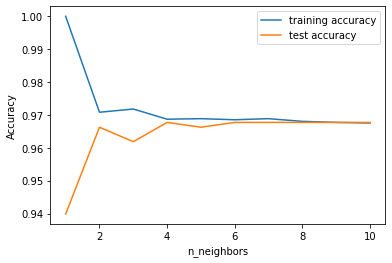

In [23]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Manhattan Distance (versus the default Minkowski distance tuned act like Euclidean Distance)

(Not too much different in this case.)

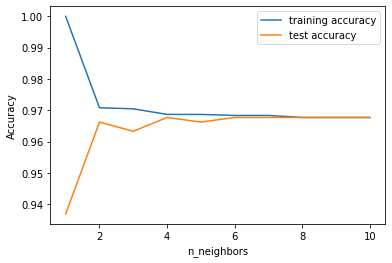

In [24]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Cross Validation



In [25]:
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.96498371 0.96742671 0.96821516 0.96821516 0.96903015]
cv_scores mean:
0.967574179230081


### Grid Search

Get the Best params is {'metric': 'chebyshev', 'n_neighbors': 9, 'weights': 'distance'}. The best accuracy is 0.968.

In [26]:
from sklearn.model_selection import GridSearchCV

knn2 = knn_cv

param_grid = {
            'n_neighbors': np.arange(1, 10, 2),
            # 'leaf_size': np.arange(20,40),
            # 'p': [1,2],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'manhattan', 'chebyshev'],
                  }



#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, verbose=1)
knn_gscv.fit(X_train, y_train)

#best performing k (on training set)
print('best params' ,knn_gscv.best_params_)

#accuracy of best performing k
print('accuracy of best performing params' ,knn_gscv.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
best params {'metric': 'chebyshev', 'n_neighbors': 9, 'weights': 'distance'}
accuracy of best performing params 0.9678997793936113


### Evaluation Metrics

In KNN model:

Test set R^2: 0.96

Test set RMSE: 0.04

Test set MSE: 0.04

Test set F1: 0.00

In [27]:
#https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

print("Test set R^2: {:.2f}".format(knn_gscv.score(X_test, y_test)))

Test set R^2: 0.96


In [28]:
from sklearn.metrics import mean_squared_error
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, knn_gscv.predict(X_test))))

Test set RMSE: 0.04


In [29]:
from sklearn.metrics import mean_absolute_error
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, knn_gscv.predict(X_test))))

Test set MSE: 0.04


In [30]:
from sklearn.metrics import f1_score
print("Test set F1: {:.2f}".format(f1_score(y_test, knn_gscv.predict(X_test))))


Test set F1: 0.00


## Support Vector Machines

In [31]:
# polynomial kernel
svmPoly1 = SVC(kernel='poly', C=10).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmPoly1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmPoly1.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.96


In [32]:
# radial basis function kernel
svmRBF1 = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF1.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.97


In [33]:
X_train, X_test, y_train, y_test   = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)


# k = 4
svc = SVC()
svc.fit(X_train, y_train)
print("svc score: {}".format(svc.score(X_train, y_train)))

svc score: 0.9677366791591983


### Comparing different values for gamma

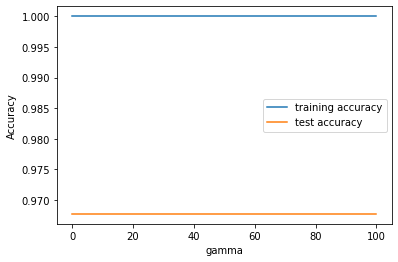

In [34]:
training_accuracy = []
test_accuracy = []

gamma_settings = [0.001, 0.01, 0.1, 1, 10, 100]

for gamma in gamma_settings:
    # build the model
    svc = SVC(gamma=gamma)
    svc.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(svc.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(svc.score(X_test, y_test))
    
plt.plot(gamma_settings, training_accuracy, label="training accuracy")
plt.plot(gamma_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

### Comparing different values for C

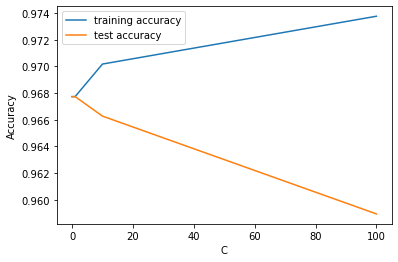

In [35]:
training_accuracy = []
test_accuracy = []

C_settings = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_settings:
    # build the model
    svc = SVC(C=C)
    svc.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(svc.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(svc.score(X_test, y_test))
    
plt.plot(C_settings, training_accuracy, label="training accuracy")
plt.plot(C_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

### Comparing different values for kernel 

In the kernel, if use linear can't run. In the plot, it's easy to see poly and rbf have better performance than sigmoid in this data set.

[LibSVM][LibSVM][LibSVM]

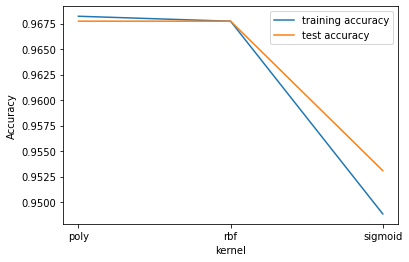

In [36]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
kernel_settings = ['poly','rbf', 'sigmoid']

for kernel in kernel_settings:
    # build the model
    svc = SVC(kernel=kernel, verbose=2)
    svc.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(svc.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(svc.score(X_test, y_test))
    
plt.plot(kernel_settings, training_accuracy, label="training accuracy")
plt.plot(kernel_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("kernel")
plt.legend()

### Cross Validation



In [37]:
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import cross_val_score

svc_cv = SVC()

#5-fold cross validation
cv_scores = cross_val_score(svc_cv, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.96742671 0.96742671 0.96821516 0.96821516 0.96740016]
cv_scores mean:
0.9677367802086071


### Grid Search

param_grid = {
            'kernel': ['rbf','poly'],
            'gamma': [0.01, 0.1, 1, 10, 100],
            'C': [0.01, 0.1, 1, 10, 100]}

The params I was trying the longest one like above, but it took 6 and half hour still fail to training. the probelm was on linear kernel. So I tried the short one. Get the Best params is {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}. The best accuracy is 0.968.

In [38]:
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid = {
            'kernel': ['rbf','poly'],
            'gamma': [0.01, 0.1, 1, 10, 100],
            'C': [0.01, 0.1, 1, 10, 100],

            # 'kernel': ['linear','rbf', 'poly', 'sigmoid'],
            # 'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            # 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  }



#grid search on all values of k in dictionary
svc_gscv = GridSearchCV(svc, param_grid, cv=5, verbose=1)
svc_gscv.fit(X_train, y_train)

#best performing k (on training set)
print('best params' ,svc_gscv.best_params_)

#accuracy of best performing k
print('accuracy of best performing params' ,svc_gscv.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
best params {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy of best performing params 0.9677367802086071


### Evaluation Metrics

In SVC model:

Test set R^2: 0.97

Test set RMSE: 0.03

Test set MSE: 0.03

Test set F1: 0.00

In [39]:
#https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

print("Test set R^2: {:.2f}".format(svc_gscv.score(X_test, y_test)))

Test set R^2: 0.97


In [40]:
from sklearn.metrics import mean_squared_error
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, svc_gscv.predict(X_test))))

Test set RMSE: 0.03


In [41]:
from sklearn.metrics import mean_absolute_error
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, svc_gscv.predict(X_test))))

Test set MSE: 0.03


In [42]:
from sklearn.metrics import f1_score
print("Test set F1: {:.2f}".format(f1_score(y_test, svc_gscv.predict(X_test))))


Test set F1: 0.00
